In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv('creditcard.csv', na_filter=True)

In [43]:
print("Presence of null values: " + str(df.isnull().values.any()))


Presence of null values: False


In [62]:
not_fraud_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

print("Number of nonfraudulent transactions: " + str(len(not_fraud_df.index)))
print("Number of fraudulent transactions: " + str(len(fraud_df.index)))

Number of nonfraudulent transactions: 284315
Number of fraudulent transactions: 492


In [63]:
not_fraud_df = df.loc[df['Class'] == 0][:492]
equalized_df = pd.concat([fraud_df, not_fraud_df])
equalized_df = equalized_df.sample(frac = 1, random_state = 42)
not_fraud_df = equalized_df[equalized_df['Class'] == 0]
fraud_df = equalized_df[equalized_df['Class'] == 1]

print("Number of nonfraudulent transactions: " + str(len(not_fraud_df.index)))
print("Number of fraudulent transactions: " + str(len(fraud_df.index)))

Number of nonfraudulent transactions: 492
Number of fraudulent transactions: 492


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(equalized_df['Time'].values.reshape(-1, 1))
equalized_df['Time'] = scaler.fit_transform(equalized_df['Time'].values.reshape(-1, 1))
scaler.fit(equalized_df['Amount'].values.reshape(-1, 1))
equalized_df['Amount'] = scaler.fit_transform(equalized_df['Amount'].values.reshape(-1, 1))

/tmp/ipykernel_13029/2678689468.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


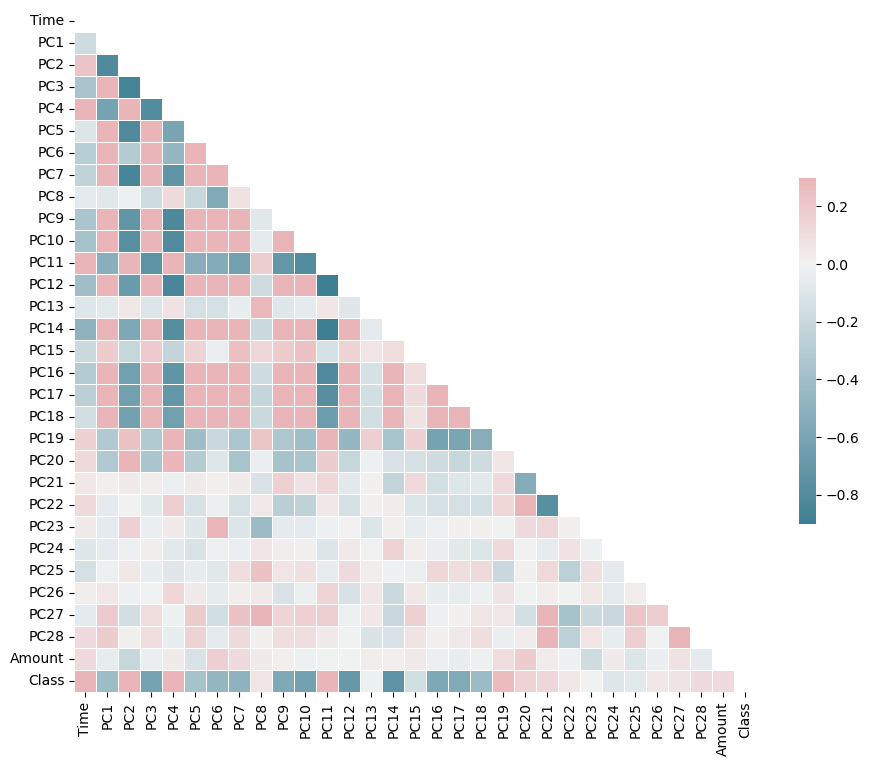

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_corr(df):
    corr=df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plot_corr(equalized_df)

array([<AxesSubplot: ylabel='a'>, <AxesSubplot: ylabel='b'>], dtype=object)

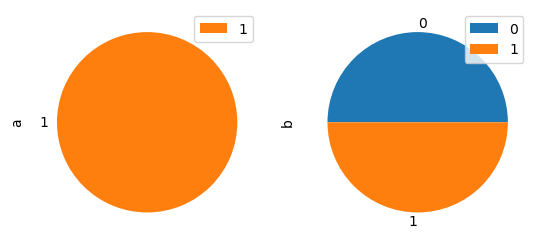

In [66]:
import matplotlib.pyplot as plt

not_fraud = len(equalized_df[equalized_df['Class'] == 0].values)
fraud = len(equalized_df[equalized_df['Class'] == 1].values)

pie_chart = pd.DataFrame({'a': [0, 1],'b': [not_fraud, fraud]})
pie_chart.plot.pie(subplots=True)

In [67]:
#pip install xgboost

In [68]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
training,test = train_test_split(equalized_df, train_size = 0.7, test_size = 0.3, shuffle=True)
training, valid = train_test_split(training, train_size = 0.7, test_size =0.3, shuffle=True) 

training_label = training.pop('Class')
test_label = test.pop('Class')
valid_label = valid.pop('Class')

In [71]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

# instantiate the algorithms
xgb = XGBClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
nbc = GaussianNB()
LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
SVM = SVC(kernel='rbf', C=1,gamma='auto')
knn = KNeighborsClassifier(n_neighbors=3)


In [72]:
# train the models
xgb.fit(training, training_label)
dtc.fit(training, training_label)
rfc.fit(training, training_label)
nbc.fit(training, training_label)
LR.fit(training, training_label)
SVM.fit(training, training_label)
knn.fit(training, training_label)


KNeighborsClassifier(n_neighbors=3)

In [73]:
# try and predict an outcome from the test set
xgb_predict = xgb.predict(test)
dtc_predict = dtc.predict(test)
rfc_predict = rfc.predict(test)
nbc_predict = nbc.predict(test)
LR_predict = LR.predict(test)
SVM_predict = SVM.predict(test)
knn_predict = knn.predict(test)

In [74]:
# judge accuracy using built-in function 
accuracy = dict()
accuracy['XGBoost'] = accuracy_score(test_label, xgb_predict)
accuracy['Naive_bayes'] = accuracy_score(test_label, nbc_predict)
accuracy['DecisionTree'] = accuracy_score(test_label, dtc_predict)
accuracy['RandomForest'] = accuracy_score(test_label,rfc_predict)
accuracy['support_vector_Machines'] = accuracy_score(test_label,SVM_predict)
accuracy['Linear Regression'] = accuracy_score(test_label,LR_predict)
accuracy['KNN'] = accuracy_score(test_label,knn_predict)

In [75]:
pp.pprint(accuracy)


{   'DecisionTree': 1.0,
    'KNN': 0.9459459459459459,
    'Linear Regression': 0.9763513513513513,
    'Naive_bayes': 0.9864864864864865,
    'RandomForest': 1.0,
    'XGBoost': 1.0,
    'support_vector_Machines': 0.956081081081081}


In [76]:
# perform validation testing for dataset
xgb_predict = xgb.predict(valid)
dtc_predict = dtc.predict(valid)
rfc_predict = rfc.predict(valid)
nbc_predict = nbc.predict(valid)
LR_predict = LR.predict(valid)
SVM_predict = SVM.predict(valid)
knn_predict = knn.predict(valid)

In [77]:
# judge accuracy using built-in function
accuracy['XGBoost'] = accuracy_score(valid_label, xgb_predict) 
accuracy['Naive_bayes'] = accuracy_score(valid_label, nbc_predict)
accuracy['DecisionTree'] = accuracy_score(valid_label, dtc_predict)
accuracy['RandomForest'] = accuracy_score(valid_label,rfc_predict)
accuracy['support_vector_Machines'] = accuracy_score(valid_label,SVM_predict)
accuracy['Linear Regression'] = accuracy_score(valid_label,LR_predict)
accuracy['KNN'] = accuracy_score(valid_label,knn_predict)

In [78]:
pp.pprint(accuracy)


{   'DecisionTree': 1.0,
    'KNN': 0.9468599033816425,
    'Linear Regression': 0.9855072463768116,
    'Naive_bayes': 0.9758454106280193,
    'RandomForest': 0.9903381642512077,
    'XGBoost': 1.0,
    'support_vector_Machines': 0.9420289855072463}


In [79]:
max_accuracy = max(accuracy,key=accuracy.get)
pp.pprint("Most accurate algorithm is: " + str(max_accuracy))

'Most accurate algorithm is: XGBoost'
